In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("/Users/anmolsingh/desktop/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [20]:
from sklearn.preprocessing import LabelEncoder as label
le=label()
gender=le.fit_transform(df.sex)
df['gender']=gender
df=df.drop("sex",axis=1)
df

,age,bmi,children,smoker,region,charges,gender
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


# Visualization

Text(0, 0.5, 'bmi')

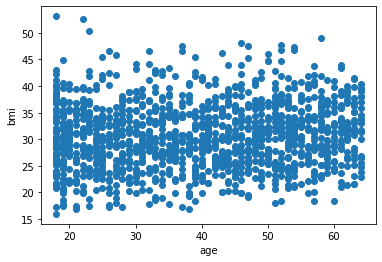

In [21]:
plt.scatter(df.age,df.bmi)
plt.xlabel("age")
plt.ylabel("bmi")

Text(0, 0.5, 'Charges')

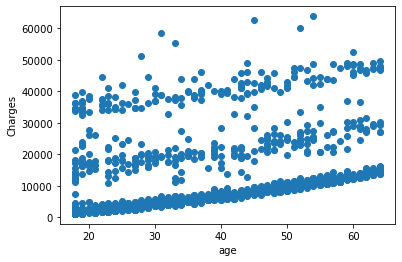

In [23]:
plt.scatter(df.age,df.charges)
plt.xlabel("age")
plt.ylabel("Charges")

In [24]:
import seaborn as sn

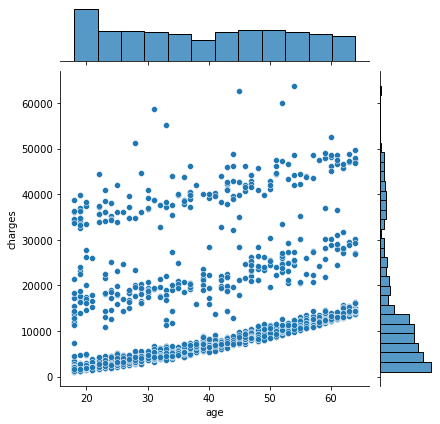

In [25]:
sn.jointplot(data=df,x="age",y="charges")

<AxesSubplot:xlabel='charges', ylabel='count'>

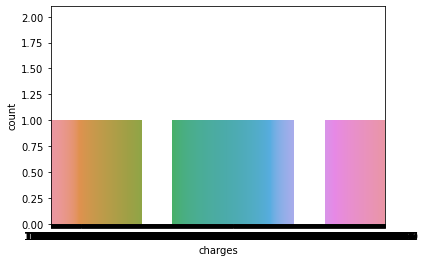

In [28]:
sn.countplot(x=df.charges,data=df)

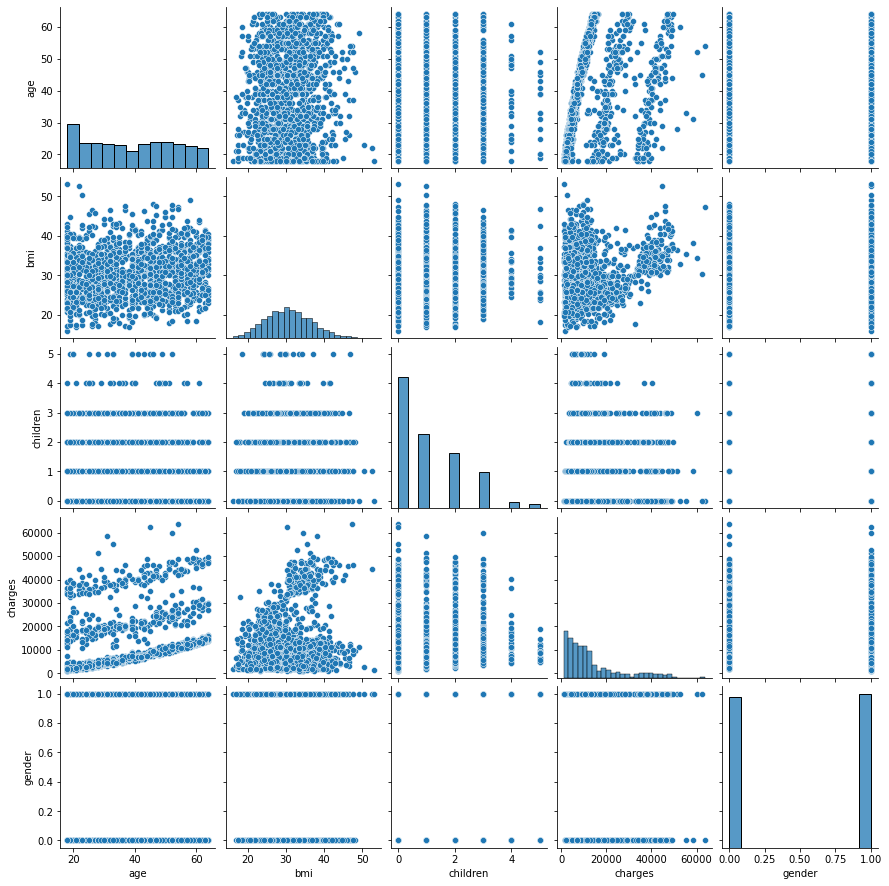

In [29]:
sn.pairplot(df)

<AxesSubplot:>

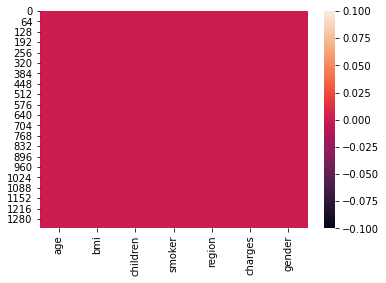

In [30]:
sn.heatmap(df.isnull())


# Prediction

In [33]:
from sklearn.linear_model import LinearRegression as lenreg
from sklearn.model_selection import train_test_split as train 
lr=lenreg()

In [34]:
df

,age,bmi,children,smoker,region,charges,gender
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [35]:
smoker={"yes":1,"no":0}
df["smoker"]=df.smoker.map(smoker)
df

,age,bmi,children,smoker,region,charges,gender
0,19,27.900,0,1,southwest,16884.92400,0
1,18,33.770,1,0,southeast,1725.55230,1
2,28,33.000,3,0,southeast,4449.46200,1
3,33,22.705,0,0,northwest,21984.47061,1
4,32,28.880,0,0,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830,1
1334,18,31.920,0,0,northeast,2205.98080,0
1335,18,36.850,0,0,southeast,1629.83350,0
1336,21,25.800,0,0,southwest,2007.94500,0


In [39]:
x=df.drop(["region","charges"],axis=1)
y=df["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [103]:
xtrain,xtest,ytrain,ytest=train(x,y,test_size=0.2,random_state=42)

In [104]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [105]:
lr.score(xtrain,ytrain)

0.7410888590280913

In [115]:
res=lr.predict(xtest)

In [116]:
lr.score(xtest,ytest)

0.7811302113434095